In [1]:
import sounddevice as sd
import numpy as np #NumPyは基本必須です。インポートしてください。
import wave #オーディオファイルを扱いたい場合インポートし|ます
%matplotlib inline

In [2]:
fs = 192000
sd.default.samplerate = fs

In [3]:
sd.query_devices()

> 0 Built-in Microphone, Core Audio (2 in, 0 out)
< 1 Built-in Output, Core Audio (0 in, 2 out)
  2 Babyface Pro (72991368), Core Audio (14 in, 14 out)
  3 Babyface Pro (72994147), Core Audio (14 in, 14 out)
  4 機器セット, Core Audio (28 in, 28 out)

In [4]:
sd.default.device = 4
# sd.default.device = [4, 5]として入出力をそれぞれ設定することもできます。

In [5]:
import random
import math

ran = np.array([random.random()-0.5 for i in range(fs)])
zeros = np.zeros(fs)
pi = np.pi
f1 = 40000
f2 = 1000
sin1 = np.sin(2*pi*f1*np.arange(0,fs)/fs)
sin2 = np.sin(2*pi*f2*np.arange(0,fs)/fs)
sig = np.array([sin1,sin2,ran])
f_list = [f1,f2,f1]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


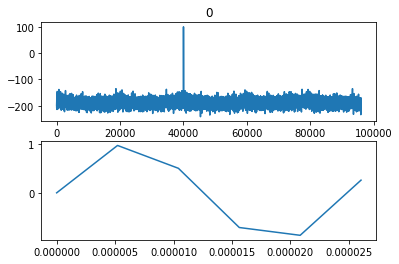

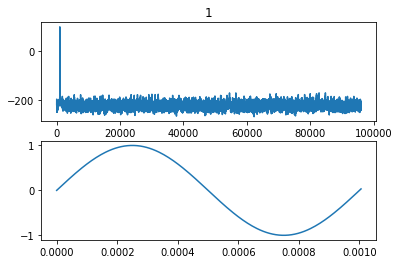

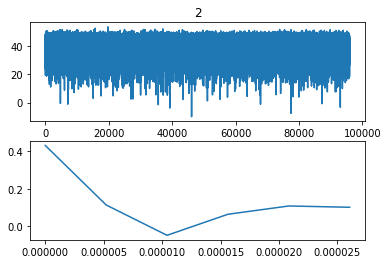

In [6]:
import matplotlib.pyplot as plt

for i,s in enumerate(sig):
    sigF = np.fft.fft(s, n=fs)

    fig = plt.figure(i)
 
    ax1 = fig.add_subplot(211,title = str(i))
    ax2 = fig.add_subplot(212)
    ax1.plot(20*np.log10(sigF[0:int(fs/2)]))
    ax2.plot(np.arange(0,int(fs/f_list[i])+2)/fs,s[0:int(fs/f_list[i])+2])
    plt.show()

In [7]:
#アンプfullで20Vppになるように調整
sig_list = np.zeros((fs,28))
sig_list[:,0] = sig[0]*0.23
sig_list[:,1] = sig[0]*0.40
sig_list[:,2] = sig[0]*0.97
sig_list[:,3] = sig[0]*1.28
sig_list[:,14] = sig[0]*0.71
sig_list[:,15] = sig[0]*0.84
sig_list[:,16] = sig[0]*2.0
sig_list[:,17] = sig[0]*2.20

In [23]:
#アンプfullで20Vppになるように調整
sig_list = np.zeros((fs,28))
sig_list[:,2] = sig[1]


In [24]:
#全部15Vppぐらいになるように調整
sd.play(sig_list*3.5/4,fs,loop=True) 

In [18]:
#全部15Vppぐらいになるように調整
sd.play(sig[1],fs,loop=True) 

In [25]:
sd.stop()

In [ ]:
sd.play(sig[1],fs,loop=False) 
sd.play(sig[1],fs,loop=False) 

In [ ]:
#ヘッドフォン出力のLRそれぞれからアナログ出力のLRを引く必要がある
sig_list = np.zeros((fs,28))
sig_list[:,0] = sig[0]/12*20
sig_list[:,1] = sig[0]/4*12
sig_list[:,2] = sig[0]*3
sig_list[:,3] = sig[0]*415/100
sig_list[:,14] = sig[0]*95/100
sig_list[:,15] = sig[0]*13/10
sig_list[:,16] = sig[0]*28/10
sig_list[:,17] = sig[0]*14/10

In [ ]:
sig_list = np.zeros((fs,14))
sig_list[:,2] = 1.7*sig[0]
sd.play(sig_list,fs,loop=True) 

In [ ]:
sd.stop()

In [ ]:
duration = 5.5  # seconds
def callback(indata, outdata, frames, time, status):
    if status:
        print(status)
    outdata[:] = indata

with sd.Stream(channels=2, callback=callback):
    sd.sleep(int(duration * 1000))

In [ ]:
!python3  plot_input.py

In [ ]:
sd.default.query_devices()